# importing libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# load data

In [4]:
data_train_path = r"C:\Users\Dell\Downloads\Fruits_Vegetables\train"
data_test_path = r"C:\Users\Dell\Downloads\Fruits_Vegetables\test"
data_val_path = r"C:\Users\Dell\Downloads\Fruits_Vegetables\validation"

In [34]:
img_width = 180                                                                   # Standardizing Image Size
img_height = 180

In [35]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)  # false because i already created three folders

Found 3115 files belonging to 36 classes.


In [7]:
data_train.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [8]:
data_cat = data_train.class_names

In [9]:
data_val =  tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False)

Found 351 files belonging to 36 classes.


In [10]:
data_test =  tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


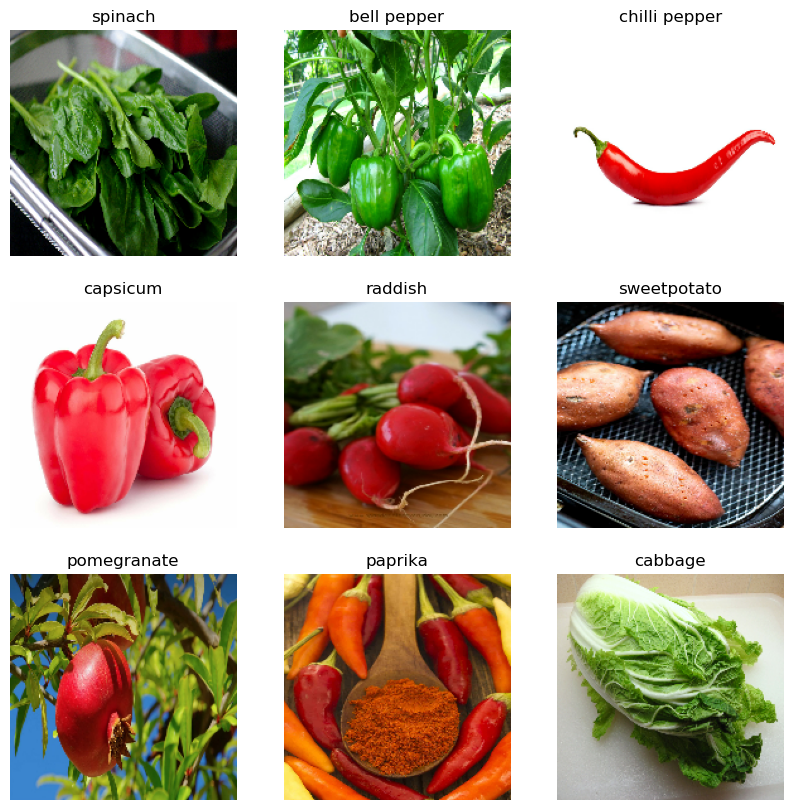

In [11]:
plt.figure(figsize=(10,10))
for image, lables in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[lables[i]])
        plt.axis("off")

# build the sequestial model

In [13]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))])

# Compile model

In [15]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train model

In [16]:
epochs_size = 25
history = model.fit(data_train, validation_data= data_val, epochs=epochs_size)

Epoch 1/25
98/98 [==============================] - 62s 597ms/step - loss: 3.1547 - accuracy: 0.1274 - val_loss: 2.2745 - val_accuracy: 0.3447
Epoch 2/25
98/98 [==============================] - 59s 584ms/step - loss: 2.3460 - accuracy: 0.3165 - val_loss: 1.4821 - val_accuracy: 0.6781
Epoch 3/25
98/98 [==============================] - 61s 597ms/step - loss: 1.7028 - accuracy: 0.4992 - val_loss: 0.8882 - val_accuracy: 0.8006
Epoch 4/25
98/98 [==============================] - 63s 619ms/step - loss: 1.1540 - accuracy: 0.6661 - val_loss: 0.5262 - val_accuracy: 0.8974
Epoch 5/25
98/98 [==============================] - 65s 638ms/step - loss: 0.6062 - accuracy: 0.8254 - val_loss: 0.4357 - val_accuracy: 0.9060
Epoch 6/25
98/98 [==============================] - 65s 635ms/step - loss: 0.3556 - accuracy: 0.9069 - val_loss: 0.3917 - val_accuracy: 0.9373
Epoch 7/25
98/98 [==============================] - 64s 624ms/step - loss: 0.2451 - accuracy: 0.9403 - val_loss: 0.4300 - val_accuracy: 0.9316

# Evaluation matrix

Text(0.5, 1.0, 'loss')

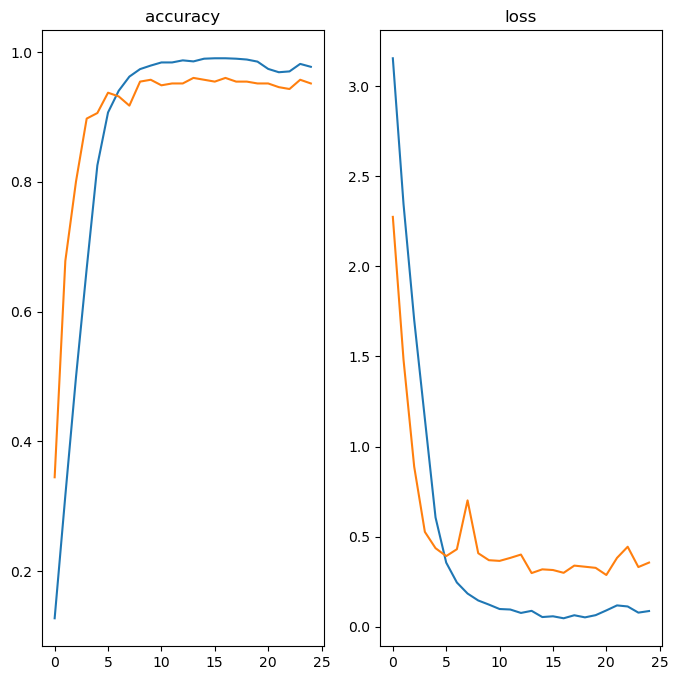

In [17]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label='validation accuracy')
plt.title('accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training loss')
plt.plot(epochs_range, history.history['val_loss'],label='validation loss')
plt.title('loss')

# Predictions

In [36]:
image_1 = r"C:\Users\Dell\Downloads\cabbage image.webp"
image_1 = tf.keras.utils.load_img(image_1,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image_1)
img_bat = tf.expand_dims(img_arr,0)

In [37]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 23ms/step


In [38]:
score = tf.nn.softmax(predict)

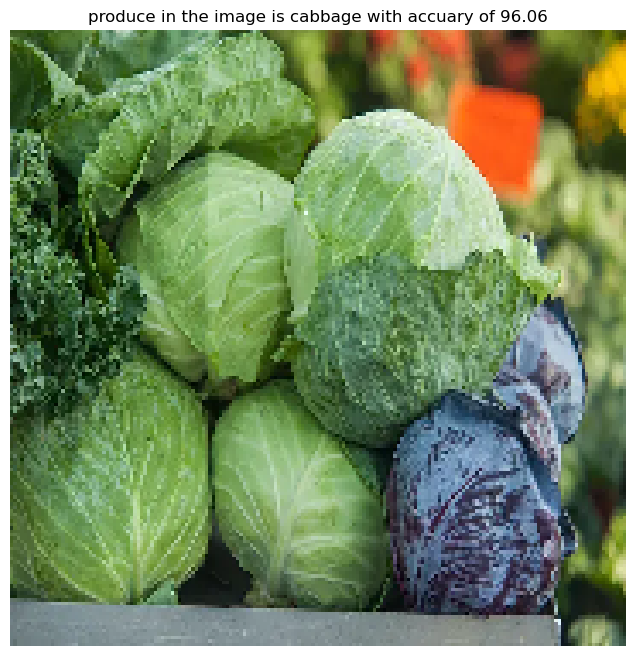

In [39]:
# Display the image with the prediction and accuracy
plt.figure(figsize=(8, 8))
plt.imshow(image_1)
plt.axis('off')  # Hide the axes
plt.title('produce in the image is {} with accuary of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))
plt.show()

In [22]:
image_2 = r"C:\Users\Dell\Downloads\Mango Image.jpg"
image_2 = tf.keras.utils.load_img(image_2,target_size=(img_height,img_width))
img_arr_2 = tf.keras.utils.array_to_img(image_2)
img_bat_2 = tf.expand_dims(img_arr_2,0)

In [23]:
predict_2 = model.predict(img_bat_2)

1/1 [==============================] - 0s 17ms/step


In [24]:
score_2 = tf.nn.softmax(predict_2)

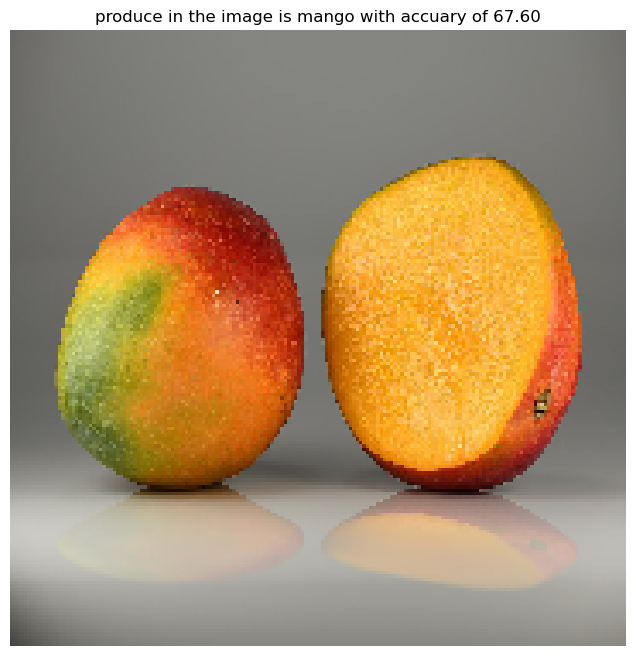

In [25]:
# Display the image with the prediction and accuracy
plt.figure(figsize=(8, 8))
plt.imshow(image_2)
plt.axis('off')  # Hide the axes
plt.title('produce in the image is {} with accuary of {:0.2f}'.format(data_cat[np.argmax(score_2)],np.max(score_2)*100))
plt.show()

In [26]:
image_3 = r"C:\Users\Dell\Downloads\paprika image.webp"
image_3 = tf.keras.utils.load_img(image_3,target_size=(img_height,img_width))
img_arr_3 = tf.keras.utils.array_to_img(image_3)
img_bat_3 = tf.expand_dims(img_arr_3,0)

In [27]:
predict_3 = model.predict(img_bat_3)

1/1 [==============================] - 0s 24ms/step


In [28]:
score_3 = tf.nn.softmax(predict_3)

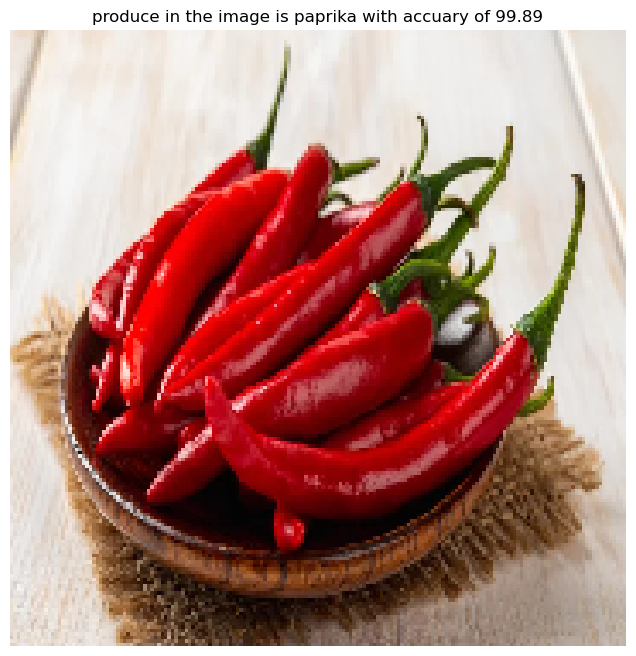

In [29]:
# Display the image with the prediction and accuracy
plt.figure(figsize=(8, 8))
plt.imshow(image_3)
plt.axis('off')  # Hide the axes
plt.title('produce in the image is {} with accuary of {:0.2f}'.format(data_cat[np.argmax(score_3)],np.max(score_3)*100))
plt.show()

In [30]:
image_4 = r"C:\Users\Dell\Desktop\Produce Classifier\corn.jpg"
image_4 = tf.keras.utils.load_img(image_4,target_size=(img_height,img_width))
img_arr_4 = tf.keras.utils.array_to_img(image_4)
img_bat_4 = tf.expand_dims(img_arr_4,0)

In [31]:
predict_4 = model.predict(img_bat_4)

1/1 [==============================] - 0s 17ms/step


In [32]:
score_4 = tf.nn.softmax(predict_4)

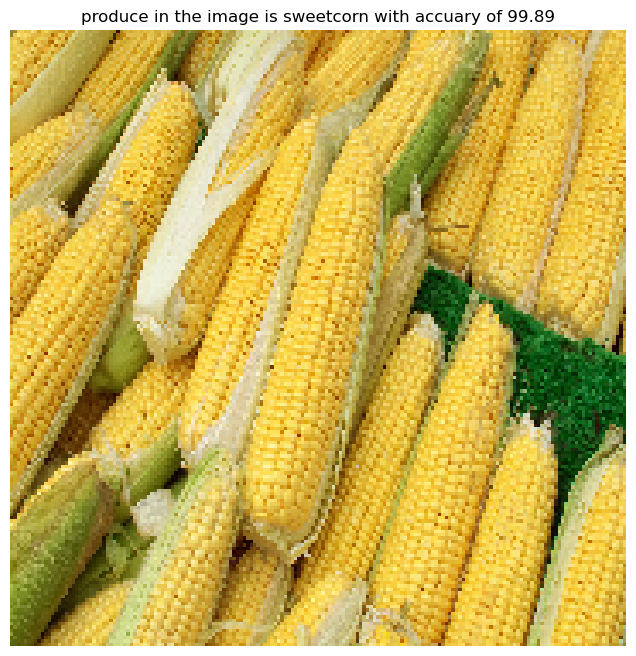

In [33]:
# Display the image with the prediction and accuracy
plt.figure(figsize=(8, 8))
plt.imshow(image_4)
plt.axis('off')  # Hide the axes
plt.title('produce in the image is {} with accuary of {:0.2f}'.format(data_cat[np.argmax(score_4)],np.max(score_3)*100))
plt.show()